Load packages

In [1]:
library(ggplot2)
library(tidyverse)
library(MASS)
library(car)
library(dplyr)
library(party)
library(rpart)
library(rattle)
library(RColorBrewer)
library(caret)
library(rpart.plot)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


载入程辑包：'MASS'


The following object is masked from 'package:dplyr':

    select


载入需要的程辑包：carData


载入程辑包：'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Warning message:
"程辑包'party'是用R版本4.1.3 来建造的"
载入需要的程辑包：grid

载入需要的程辑包：mvtnorm

载入需要的程辑包：modeltools

载入需要的程辑包：stats4


载入程辑包：'modeltools'


The following object is masked from 'package:car':

    Predict


载入需要的程辑包：strucchange

Warning message:
"程辑包'strucchange'是用R版本4.1.3 来建造的"
载入需要的程辑包：zoo

Warning me

Read Files

In [2]:
data<-read.csv('data.csv')[-1]

In [3]:
head(data)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
2,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
3,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
4,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
5,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
6,32,0,1,1005,1,2,2,1,4,1,...,3,3,0,8,2,2,7,7,3,6


In [4]:
data$JobRole

[1] 7 6 2 6 2 2 2 2 4 0 2 2 6 2 2 4 6 2 3 6 4 8 5 6 6 3 6 7 0 3 2 0 2 8 6 6 8
  [38] 8 6 7 2 2 2 7 2 5 7 6 7 2 2 2 7 0 7 5 7 2 2 4 4 2 5 7 0 3 4 6 6 6 7 6 6 6
  [75] 2 4 7 5 5 1 2 6 7 6 4 4 8 2 0 7 0 7 7 0 7 5 7 7 7 2 1 6 2 6 0 3 5 7 6 2 0
 [112] 2 3 2 6 7 3 7 2 3 6 7 6 5 7 6 0 8 2 4 6 7 7 7 1 4 4 7 7 1 2 6 6 6 7 6 2 3
 [149] 2 2 6 7 8 2 7 4 4 6 7 8 6 6 6 0 6 3 6 7 7 6 6 8 2 2 7 6 6 2 7 2 6 6 8 2 4
 [186] 6 3 5 4 0 3 6 4 6 3 6 2 4 4 4 4 4 6 2 0 7 6 2 0 0 7 4 7 5 6 3 7 6 7 7 2 6
 [223] 5 7 4 6 8 7 7 6 2 3 1 3 2 3 2 3 8 2 2 7 6 6 3 5 6 4 6 4 4 0 6 6 7 4 2 5 6
 [260] 2 2 7 2 3 2 7 0 0 0 2 3 3 6 7 6 5 3 7 4 5 5 7 7 2 0 6 2 0 2 6 5 6 8 7 6 7
 [297] 2 7 2 4 3 8 0 7 0 2 7 5 0 6 1 2 6 3 3 2 0 6 6 7 7 7 6 6 6 4 3 7 7 5 2 7 6
 [334] 0 6 7 2 2 7 7 4 5 4 7 4 6 4 8 5 7 1 2 3 6 7 7 0 8 7 7 0 2 8 8 2 4 7 0 7 6
 [371] 8 6 0 2 7 0 7 6 7 3 7 8 6 6 7 6 2 7 2 4 5 2 5 7 4 2 0 7 6 2 3 7 7 7 2 2 4
 [408] 6 3 6 4 3 4 0 8 8 2 3 6 2 5 6 1 7 3 3 2 7 4 5 2 2 6 7 4 3 2 8 0 0 1 2 7 2
 [445] 7 3 7 7 4 2 7 4 7 1 4 5 3 8 7 0 7 7 7 2 4 0 3 7 6 7 8 0 4 5 6 7 2 3 8 2 8
 [482] 6 7 2 7 6 7 6 0 5 6 2 3 1 8 8 8 3 6 7 6 6 7 6 7 2 4 7 6 0 1 4 6 6 6 2 6 7
 [519] 7 6 7 7 6 2 0 7 0 7 7 0 4 5 7 7 5 3 7 4 3 8 6 5 4 2 7 7 8 6 7 0 2 1 0 6 0
 [556] 8 2 0 2 6 4 3 6 7 8 6 7 7 3 7 6 2 0 7 6 4 7 6 4 6 8 2 0 7 3 2 2 2 5 2 5 7
 [593] 3 4 6 5 6 4 6 1 4 2 4 6 4 0 6 7 7 5 5 4 7 1 6 6 3 0 6 7 6 7 7 6 7 7 6 4 7
 [630] 1 4 2 6 1 7 4 6 2 7 6 2 7 8 2 6 8 7 4 8 5 0 7 7 3 1 1 2 2 6 7 2 4 8 6 0 8
 [667] 4 2 6 2 6 2 7 6 0 8 0 2 6 7 6 5 2 8 7 7 2 2 8 2 0 6 4 7 0 7 2 8 7 3 6 3 7
 [704] 7 7 7 7 4 7 6 3 6 6 2 5 0 5 2 2 7 6 4 6 4 4 2 4 6 4 0 5 6 2 4 2 0 0 4 4 4
 [741] 2 3 2 4 0 0 5 7 7 3 7 7 2 4 8 3 2 7 3 1 7 2 6 8 8 6 5 0 7 6 5 7 6 4 3 7 8
 [778] 2 6 6 0 2 4 6 0 0 2 4 6 1 0 7 6 2 0 7 2 2 6 3 2 7 7 6 3 7 0 7 6 4 3 7 4 0
 [815] 5 6 2 4 8 6 7 7 4 6 2 4 1 6 2 7 2 2 0 6 7 1 7 5 7 7 2 2 2 2 7 6 4 0 2 7 8
 [852] 3 2 6 6 4 2 6 3 6 6 3 6 1 6 7 7 3 2 5 7 2 7 2 2 6 8 4 1 7 2 6 4 6 7 7 6 5
 [889] 7 6 4 6 6 6 5 0 0 7 5 3 6 2 6 0 5 5 6 3 7 6 6 8 6 3 0 2 3 7 3 4 2 2 3 1 6
 [926] 6 7 4 0 2 2 4 2 6 6 7 3 3 6 2 6 2 0 1 2 5 7 7 3 4 7 7 8 2 3 3 3 6 0 6 7 6
 [963] 3 7 7 2 4 2 7 4 8 4 2 2 7 7 4 6 0 2 8 7 6 0 7 4 7 7 6 6 7 7 0 7 4 6 7 6 6
[1000] 3 2 2 4 2 2 1 2 0 5 5 5 7 8 7 5 6 6 2 2 7 6 8 2 6 5 7 7 2 6 2 7 7 2 4 0 1
[1037] 2 4 7 1 5 7 2 5 0 6 6 7 7 7 2 7 6 6 0 5 8 7 7 8 2 8 4 7 1 0 2 7 2 6 7 2 2
[1074] 4 0 3 3 6 5 4 3 0 2 2 7 6 5 8 2 6 0 4 6 0 7 2 3 2 0 0 8 6 8 7 6 7 7 1 2 7
[1111] 2 4 4 6 6 6 3 6 6 7 7 7 2 0 7 0 3 6 2 3 2 0 7 2 2 3 2 6 0 6 5 6 2 7 7 4 4
[1148] 2 4 2 6 4 6 8 3 2 4 0 4 4 4 4 7 6 4 1 3 7 6 6 6 2 7 0 4 4 5 5 8 6 2 0 4 0
[1185] 3 5 7 6 7 7 6 7 2 2 3 3 7 8 7 0 1 2 2 0 8 2 2 6 2 0 2 7 6 8 0 6 7 6 7 2 8
[1222] 0 1 7 2 5 6 2 1 4 2 0 4 6 7 7 7 7 2 4 2 7 3 1 6 1 1 7 6 8 0 7 6 7 7 7 2 7
[1259] 6 0 6 0 6 2 5 6 2 7 4 1 7 8 2 2 7 3 7 5 0 6 1 7 6 6 5 7 2 0 4 1 2 4 7 6 0
[1296] 7 4 1 0 0 7 3 2 4 0 6 7 6 8 7 5 6 1 1 7 6 7 2 2 7 6 2 4 1 0 2 7 7 8 1 3 5
[1333] 6 7 6 6 6 8 8 6 7 2 7 2 6 4 4 1 3 6 7 3 0 6 2 7 7 5 7 7 2 2 0 7 7 8 7 6 6
[1370] 7 6 7 4 6 3 6 6 5 7 1 7 6 6 2 7 7 2 0 0 6 2 8 7 7 4 7 7 6 0 0 1 3 2 7 6 5
[1407] 4 0 2 2 7 1 2 2 0 2 7 8 4 6 6 5 2 6 6 0 2 2 8 6 5 7 5 7 8 6 8 3 8 7 4 0 6
[1444] 3 2 4 7 7 7 6 1 7 7 7 7 6 0 6 6 2 6 7 7 4 8 2 0 4 7 2

In [5]:
nrow(data)

[1] 1470

Split Data to train & test

In [6]:
set.seed(4)
index<-sort(sample(nrow(data), nrow(data)*.9))
train<-data[index,]
test<-data[-index,]

In [7]:
head(train)
head(test)
print(nrow(train))
print(nrow(test))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
2,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
3,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
4,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
6,32,0,1,1005,1,2,2,1,4,1,...,3,3,0,8,2,2,7,7,3,6
7,59,0,2,1324,1,3,3,3,3,0,...,4,1,3,12,3,2,1,0,0,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
20,38,0,2,371,1,2,3,1,4,1,...,3,3,0,6,3,3,3,2,1,2
22,36,1,2,1218,2,9,4,1,3,1,...,4,2,0,10,4,3,5,3,0,3
29,44,0,2,477,1,7,4,3,1,0,...,3,4,1,24,4,3,22,6,5,17
38,35,0,2,890,2,2,3,2,4,0,...,3,1,0,2,3,3,2,2,2,2
58,35,0,2,1142,1,23,4,3,3,0,...,3,3,1,4,3,3,2,2,2,2


[1] 1323
[1] 147


Build Model

In [8]:
model<-rpart(Attrition~.,data=train,method = "class")
model
# 左边是No的占比,右边是Yes的占比

n= 1323 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1323 224 0 (0.83068783 0.16931217)  
    2) OverTime< 0.5 948 103 0 (0.89135021 0.10864979)  
      4) TotalWorkingYears>=2.5 870  76 0 (0.91264368 0.08735632) *
      5) TotalWorkingYears< 2.5 78  27 0 (0.65384615 0.34615385)  
       10) HourlyRate>=58.5 48  11 0 (0.77083333 0.22916667) *
       11) HourlyRate< 58.5 30  14 1 (0.46666667 0.53333333)  
         22) JobInvolvement>=2.5 15   4 0 (0.73333333 0.26666667) *
         23) JobInvolvement< 2.5 15   3 1 (0.20000000 0.80000000) *
    3) OverTime>=0.5 375 121 0 (0.67733333 0.32266667)  
      6) MonthlyIncome>=2475 311  74 0 (0.76205788 0.23794212)  
       12) MaritalStatus< 1.5 217  36 0 (0.83410138 0.16589862) *
       13) MaritalStatus>=1.5 94  38 0 (0.59574468 0.40425532)  
         26) JobRole< 6.5 59  17 0 (0.71186441 0.28813559)  
           52) MonthlyIncome>=4035 40   5 0 (0.87500000 0.12500000) *
           53) MonthlyIncome< 4035 19

Check cp value

In [9]:
printcp(model)
# cp值怎么裁剪的重要指标
# cp值（复杂参数）可以作为控制树规模的惩罚因子。cp值越大，分裂的规模越小


Classification tree:
rpart(formula = Attrition ~ ., data = train, method = "class")

Variables actually used in tree construction:
 [1] DailyRate               HourlyRate              JobInvolvement         
 [4] JobRole                 JobSatisfaction         MaritalStatus          
 [7] MonthlyIncome           OverTime                TotalWorkingYears      
[10] YearsInCurrentRole      YearsSinceLastPromotion

Root node error: 224/1323 = 0.16931

n= 1323 

        CP nsplit rel error  xerror     xstd
1 0.066964      0   1.00000 1.00000 0.060897
2 0.020089      2   0.86607 0.91518 0.058758
3 0.015625      4   0.82589 0.91964 0.058875
4 0.013393      9   0.74107 0.94643 0.059566
5 0.010000     12   0.70089 0.93750 0.059338


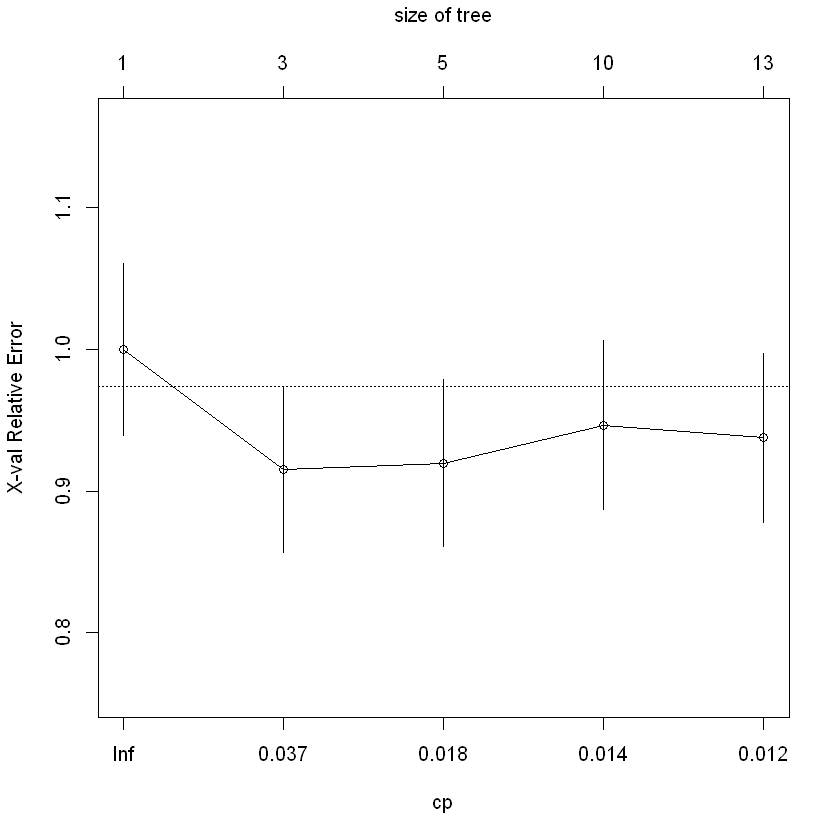

In [10]:
plotcp(model)

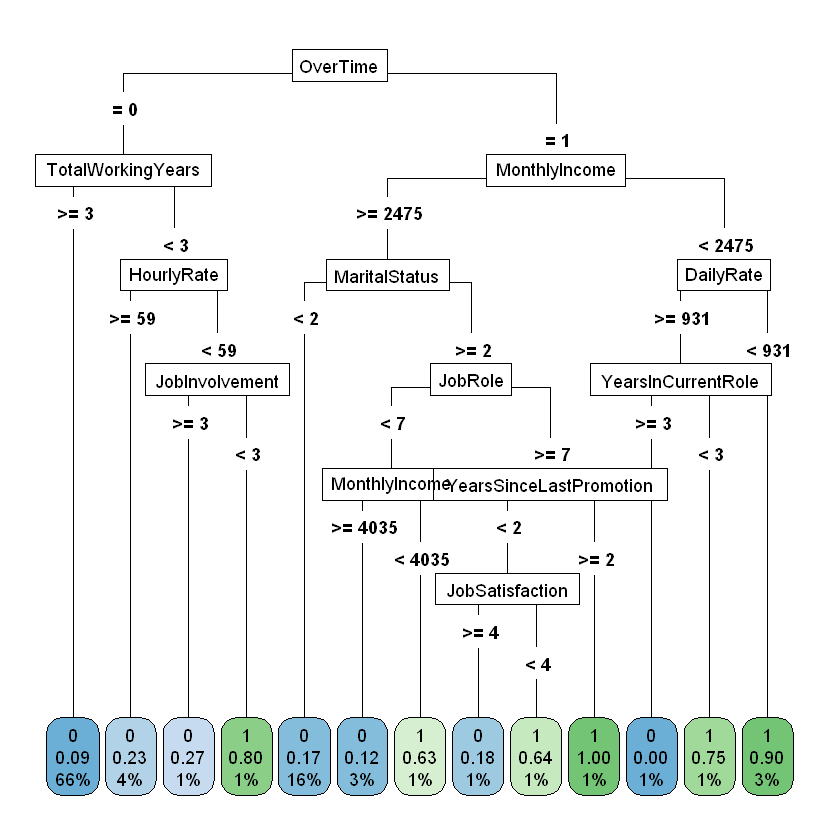

In [11]:
rpart.plot(model,type=5,tweak=1.3)

In [12]:
model2<-prune(model, cp=0.02)
model2

n= 1323 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1323 224 0 (0.8306878 0.1693122)  
   2) OverTime< 0.5 948 103 0 (0.8913502 0.1086498) *
   3) OverTime>=0.5 375 121 0 (0.6773333 0.3226667)  
     6) MonthlyIncome>=2475 311  74 0 (0.7620579 0.2379421) *
     7) MonthlyIncome< 2475 64  17 1 (0.2656250 0.7343750)  
      14) DailyRate>=931 25  12 0 (0.5200000 0.4800000)  
        28) YearsInCurrentRole>=2.5 9   0 0 (1.0000000 0.0000000) *
        29) YearsInCurrentRole< 2.5 16   4 1 (0.2500000 0.7500000) *
      15) DailyRate< 931 39   4 1 (0.1025641 0.8974359) *

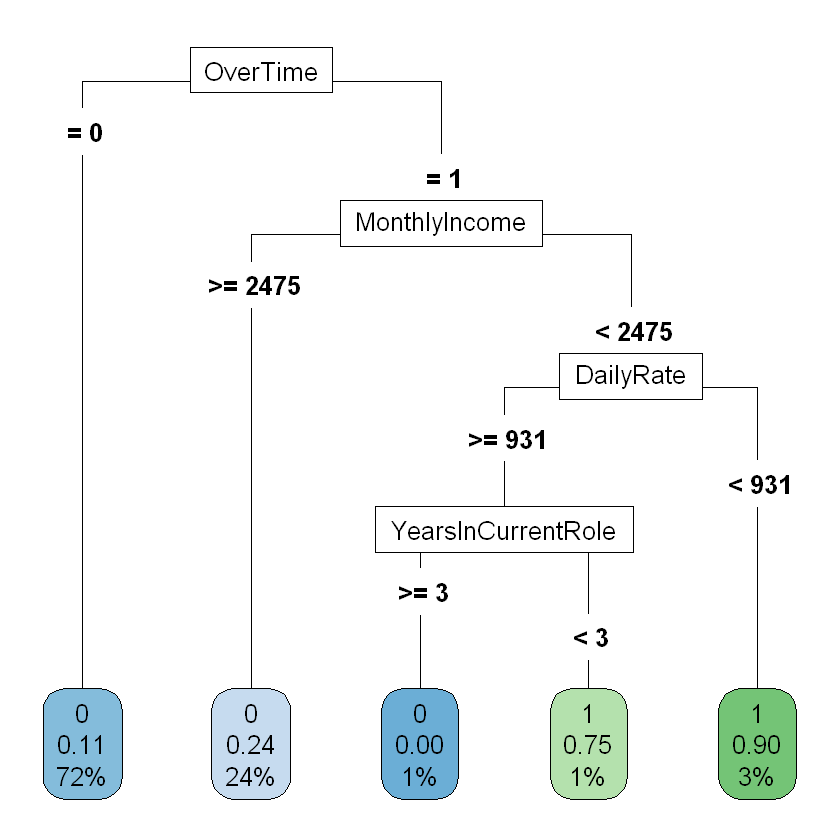

In [13]:
rpart.plot(model2,type=5,tweak=1.3)

Importance Analysis

In [14]:
importances <- varImp(model,scale = FALSE)
importances %>%
  arrange(desc(Overall))

,Overall
,<dbl>
MonthlyIncome,70.440145
TotalWorkingYears,57.332684
YearsAtCompany,45.745239
JobLevel,36.077576
YearsWithCurrManager,27.483038
Age,24.995673
OverTime,24.615338
YearsInCurrentRole,13.148697
DistanceFromHome,9.758890


In [15]:
importances2 <- varImp(model2)
importances2 %>%
  arrange(desc(Overall))

,Overall
,<dbl>
MonthlyIncome,44.327615
TotalWorkingYears,39.306864
YearsAtCompany,38.105344
JobLevel,25.516412
OverTime,24.615338
YearsWithCurrManager,18.439857
Age,14.355692
YearsInCurrentRole,11.580179
DailyRate,5.309263


Prediction

In [16]:
pred<-predict(model, newdata = test, type = "class")
pred

5   20   22   29   38   58   60   61   62   64   87  118  123  130  132  135 
   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 136  148  153  174  176  186  205  207  212  217  268  275  286  293  295  297 
   0    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0 
 314  323  339  353  356  361  375  401  426  432  473  475  477  479  490  492 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 493  494  500  508  510  542  547  558  577  600  606  611  616  630  636  650 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 657  665  675  676  693  709  711  716  724  727  737  746  760  764  806  807 
   1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0 
 830  831  838  866  871  874  887  903  905  945  954  956  958  959  971  984 
   1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 988  989  999 1001 1002 1005 1009 1027 1031 1056 1060 1062 1078 1127 1129 1131 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1138 1140 1156 1158 1160 1166 1175 1187 1219 1224 1226 1230 1232 1251 1259 1261 
   0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0 
1272 1280 1283 1287 1304 1311 1316 1326 1331 1332 1349 1350 1373 1383 1407 1425 
   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1450 1451 1454 
   0    0    0 
Levels: 0 1

Evaluation

In [17]:
confusionMatrix(factor(test$Attrition),pred)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 130   4
         1   9   4
                                          
               Accuracy : 0.9116          
                 95% CI : (0.8535, 0.9521)
    No Information Rate : 0.9456          
    P-Value [Acc > NIR] : 0.9699          
                                          
                  Kappa : 0.3362          
                                          
 Mcnemar's Test P-Value : 0.2673          
                                          
            Sensitivity : 0.9353          
            Specificity : 0.5000          
         Pos Pred Value : 0.9701          
         Neg Pred Value : 0.3077          
             Prevalence : 0.9456          
         Detection Rate : 0.8844          
   Detection Prevalence : 0.9116          
      Balanced Accuracy : 0.7176          
                                          
       'Positive' Class : 0               
                              

In [18]:
pred1<-predict(model2, newdata = test, type = "class")
pred1

5   20   22   29   38   58   60   61   62   64   87  118  123  130  132  135 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 136  148  153  174  176  186  205  207  212  217  268  275  286  293  295  297 
   0    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0 
 314  323  339  353  356  361  375  401  426  432  473  475  477  479  490  492 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 493  494  500  508  510  542  547  558  577  600  606  611  616  630  636  650 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 657  665  675  676  693  709  711  716  724  727  737  746  760  764  806  807 
   0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0 
 830  831  838  866  871  874  887  903  905  945  954  956  958  959  971  984 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 988  989  999 1001 1002 1005 1009 1027 1031 1056 1060 1062 1078 1127 1129 1131 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1138 1140 1156 1158 1160 1166 1175 1187 1219 1224 1226 1230 1232 1251 1259 1261 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1272 1280 1283 1287 1304 1311 1316 1326 1331 1332 1349 1350 1373 1383 1407 1425 
   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1450 1451 1454 
   0    0    0 
Levels: 0 1

In [19]:
confusionMatrix(factor(test$Attrition),pred1)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 131   3
         1  12   1
                                          
               Accuracy : 0.898           
                 95% CI : (0.8373, 0.9418)
    No Information Rate : 0.9728          
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : 0.0793          
                                          
 Mcnemar's Test P-Value : 0.03887         
                                          
            Sensitivity : 0.91608         
            Specificity : 0.25000         
         Pos Pred Value : 0.97761         
         Neg Pred Value : 0.07692         
             Prevalence : 0.97279         
         Detection Rate : 0.89116         
   Detection Prevalence : 0.91156         
      Balanced Accuracy : 0.58304         
                                          
       'Positive' Class : 0               
                              